# Lesson 10: Hough Transform

To find multiple instances of a shape unlike RANSAC. It is otherwise known as `voting` method.

let r rep row and c rep column, d is distance of line otrhogonal

$c = ar + b \\ rcos \theta + csin\theta = d$
![hough](../images/hough.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_getExtents(a,b,numRows,numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows-1)
    c2 = int(a*r2+b)
    return (c1,r1),(c2,r2)

In [3]:
def f_houghLines(E):
    angles = np.deg2rad(np.arange(360))
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((dMax,len(angles)))
    idx = np.argwhere(E)
    r,c = idx[:,0], idx[:,1]
    for i in range(len(r)):
        for ang in angles:
            ri, ci = r[i], c[i]
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            if di > 0 and di < dMax:
                H[di,int(np.rad2deg(ang))] += 1
    return H

In [4]:
E = cv2.imread('../images/E.png', cv2.IMREAD_GRAYSCALE)

In [5]:
E.min(),E.max(),E.dtype

(0, 255, dtype('uint8'))

In [6]:
E = E>100

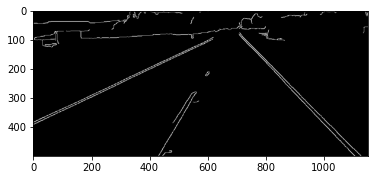

In [7]:
plt.imshow(E, cmap='gray')

In [8]:
E.shape, E.dtype

((499, 1153), dtype('bool'))

In [9]:
H = f_houghLines(E)

In [10]:
idx = np.argwhere(H==H.max())
best_d, best_theta = idx[0,0],idx[0,1]

In [11]:
best_d,best_theta

(346, 25)

**Since theta and d=diameter have been gotten, then make conversion.**
![Hough Conversion](../images/houghc.png)

In [12]:
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [13]:
a,b

(-2.1445069205095586, 818.7057477707644)

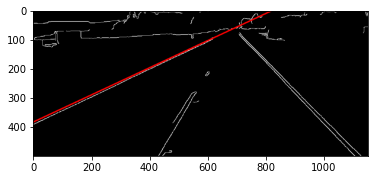

In [14]:
s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
E2 = np.zeros((E.shape[0],E.shape[1],3), dtype=np.uint8)
E3 = np.array(255*E,np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),3)
plt.imshow(I[:,:,::-1])

**To detect all the line**

In [15]:
def nlargest_idx(arr,n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

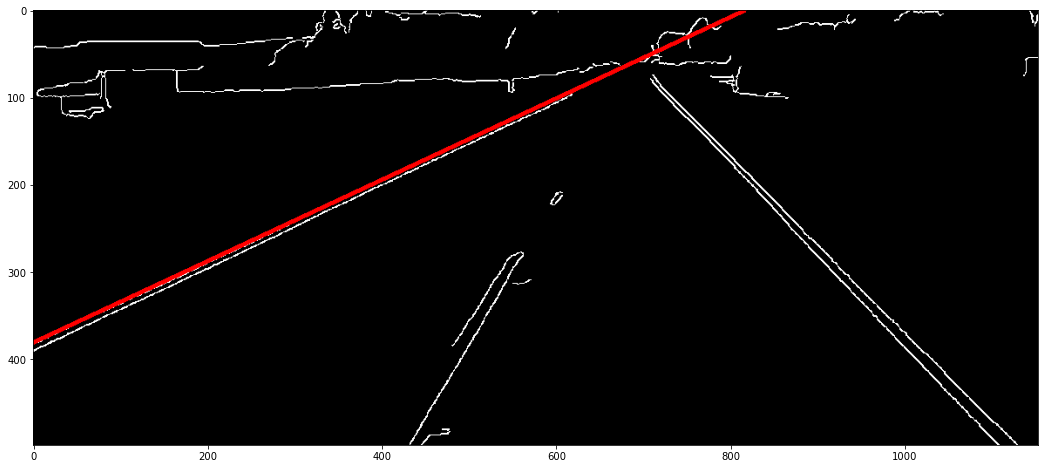

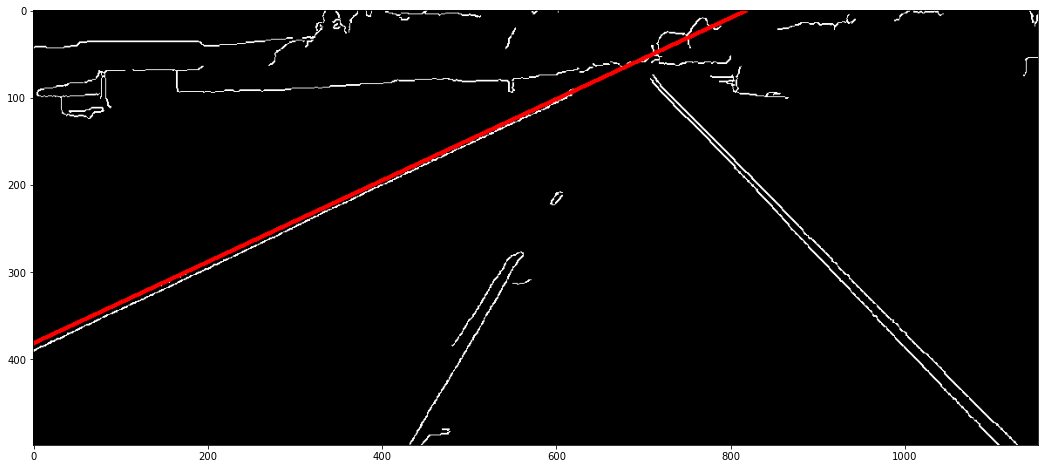

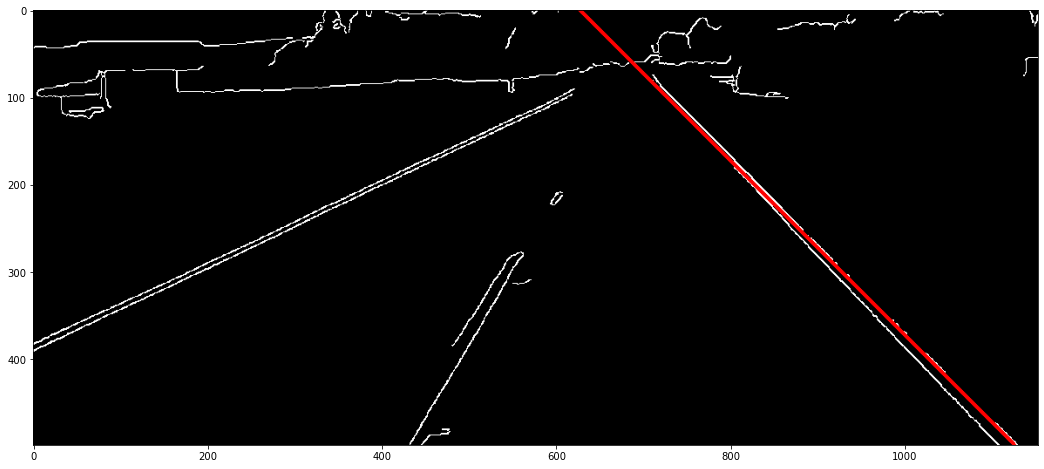

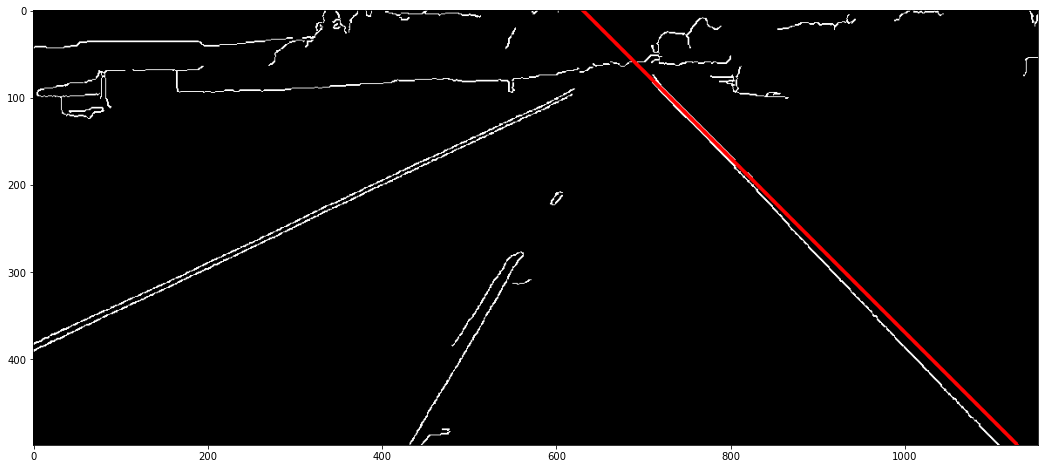

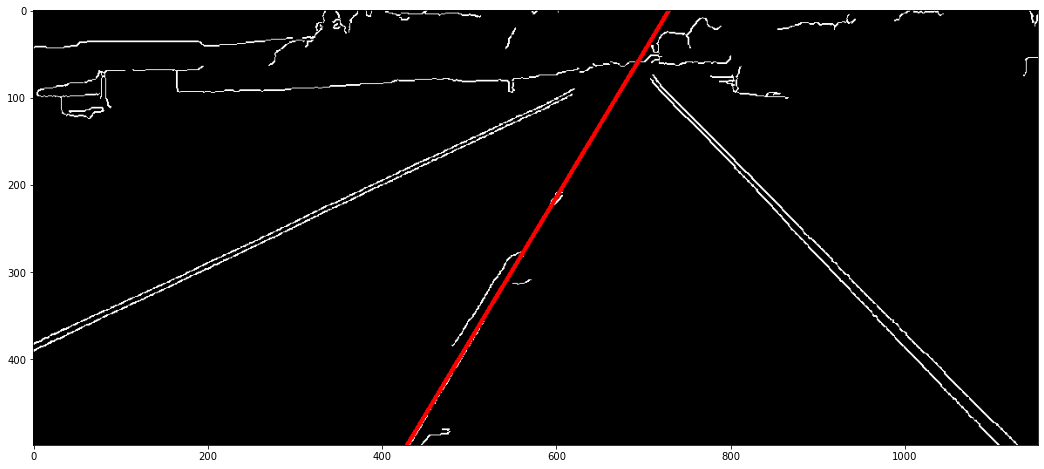

In [16]:
n = 5
x,y = nlargest_idx(H,n)
#plt.subplot(131)
for i in range(n):
    best_d, best_theta = x[i], y[i]
    theta = np.deg2rad(best_theta)
    a = -(1/np.tan(theta))
    b = best_d/np.sin(theta) 
    
    s,e = f_getExtents(a,b,E.shape[0],E.shape[1])
    E2 = np.zeros((E.shape[0],E.shape[1],3), dtype=np.uint8)
    E3 = np.array(255*E,np.uint8)
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    
    I = cv2.line(E2,s,e,(0,0,255),3)
    fig, ax = plt.subplots(figsize=(18,10))
    
    ax.imshow(I[:,:,::-1]);

## Hough: Circle

![hough circle](../images/houghcir.png)

In [17]:
def f_houghCircles(E):
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((numRows,numCols,dMax))
    idx = np.argwhere(E)
    r,c = idx[:,0], idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri, ci = r[i], c[i]
                di = int(((ri-a)**2 + (ci-a)**2)**0.5)
                if di > 0 and di < dMax:
                    H[a,b,di] += 1
    return H

In [40]:
E = plt.imread('../images/Ec.PNG')

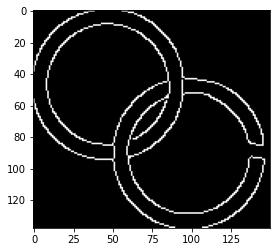

In [41]:
plt.imshow(E, cmap='gray')

In [42]:
E.shape

(138, 150)

In [43]:
H = f_houghCircles(E)

In [44]:
idx = np.argwhere(H==H.max())
best_ri, best_ci,best_d = idx[0,0],idx[0,1],idx[0,2]

In [47]:
best_ri,best_ci,best_d

(46, 2, 38)

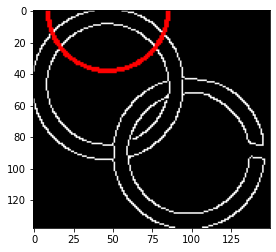

In [45]:
E2 = np.zeros((E.shape[0],E.shape[1],3), dtype=np.uint8)
E3 = np.array(255*E,np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_ri),int(best_ci)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1]);

**To detect multiple circles**

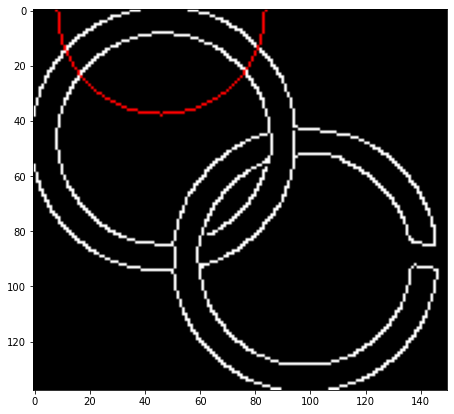

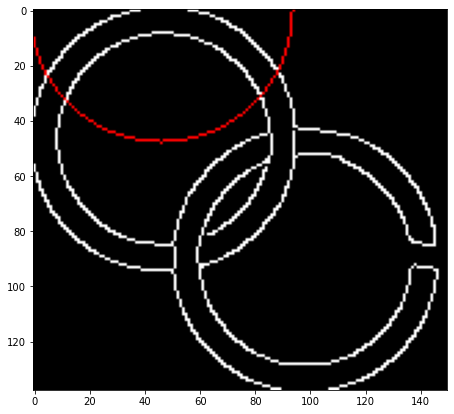

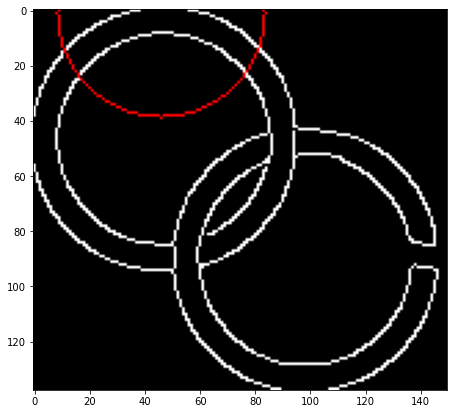

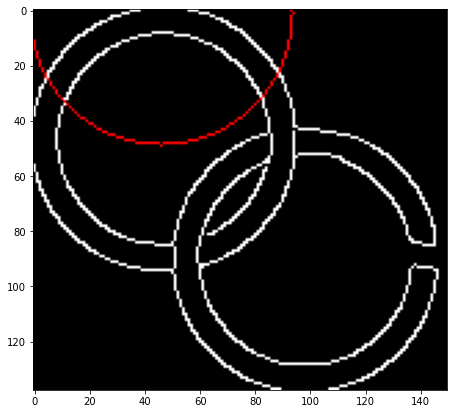

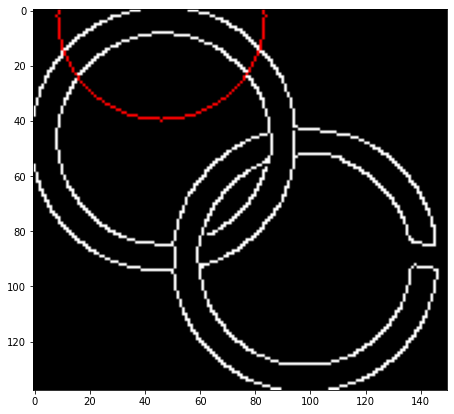

In [46]:
n = 5
x,y,z = nlargest_idx(H,n)
#plt.subplot(131)
for i in range(n):
    idx = x[0], y[0]
    best_ri, best_ci, best_d = x[i], y[i], z[i] 
    
    E2 = np.zeros((E.shape[0],E.shape[1],3), dtype=np.uint8)
    E3 = np.array(255*E,np.uint8)
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    
    I = cv2.circle(E2,(int(best_ri),int(best_ci)),int(best_d),(0,0,255),1)
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.imshow(I[:,:,::-1]);